Content

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#DataLoad
data=pd.read_csv("/kaggle/input/protom-dec2022-csv-data-updated/PROTOM_DEC2022_CSV_DATA_UPDATED.csv")
data

,DATE,BOX_PRICE,NUM_BOX_BUY,SALED,UN_SALED,HIGH_TEMP,LOW_TEMP,HIMUDITY,WIND
0,10/4/2022,480,72,72,0,31,28,82,5
1,10/5/2022,480,60,55,5,31,28,86,4
2,10/6/2022,530,57,57,0,27,27,92,17
3,10/7/2022,550,78,75,3,27,27,93,0
4,10/8/2022,530,75,75,0,29,29,83,6
...,...,...,...,...,...,...,...,...,...
59,12/2/2022,190,90,90,0,32,27,76,8
60,12/3/2022,200,85,85,0,31,27,80,10
61,12/4/2022,240,77,77,0,31,26,80,6
62,12/5/2022,200,90,90,0,30,26,80,5


In [3]:
pd.DataFrame(data).isnull().sum()

DATE           0
BOX_PRICE      0
NUM_BOX_BUY    0
SALED          0
UN_SALED       0
HIGH_TEMP      0
LOW_TEMP       0
HIMUDITY       0
WIND           0
dtype: int64

Decision Tree

In [4]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor

# create a regressor object
model= DecisionTreeRegressor(random_state = 0,max_depth=10) 
regressor=AdaBoostRegressor(base_estimator=model,n_estimators=500,learning_rate=1) #
#  model=DecisionTreeClassifier(criterion='entropy',max_depth=1)
# AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimator=400,learning_rate=1)
  
x=pd.DataFrame(data[["BOX_PRICE","LOW_TEMP","HIGH_TEMP","HIMUDITY","WIND","NUM_BOX_BUY"]])
y=pd.DataFrame(data['SALED'])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=True)


In [5]:
x_train

,BOX_PRICE,LOW_TEMP,HIGH_TEMP,HIMUDITY,WIND,NUM_BOX_BUY
56,240,24,29,75,5,72
19,420,26,30,68,10,81
34,250,26,32,70,4,78
60,200,27,31,80,10,85
17,380,29,33,74,4,78
55,180,24,30,78,2,83
53,170,26,30,82,5,95
48,180,22,24,90,5,95
33,230,27,31,72,6,86
51,170,27,32,80,4,77


In [6]:
y_train

,SALED
56,72
19,81
34,78
60,85
17,77
55,83
53,92
48,95
33,85
51,72


In [7]:

# fit the regressor with x_train and y_train data
regressor.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       random_state=0),
                  learning_rate=1, n_estimators=500)

In [8]:
y_predict=regressor.predict(x_test)

In [9]:
y_predict

array([90., 90., 72., 77., 87., 55., 55., 87., 85., 82., 83., 83., 93.,
       75., 69., 90., 77., 86., 78., 67.])

In [10]:
# from sklearn import metrics
# score=metrics.accuracy_score(y_test,y_predict)
# score*100 #accuracy 


from sklearn.metrics import r2_score
r2_score(y_test, y_predict)*100

89.06864016277353

In [11]:
# predictions=metrics.accuracy_score(y_test,y_pred)
# score2=regressor.score(y_test,y_predict)
# score2*100

# Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [13]:
x_train

,BOX_PRICE,LOW_TEMP,HIGH_TEMP,HIMUDITY,WIND,NUM_BOX_BUY
56,240,24,29,75,5,72
19,420,26,30,68,10,81
34,250,26,32,70,4,78
60,200,27,31,80,10,85
17,380,29,33,74,4,78
55,180,24,30,78,2,83
53,170,26,30,82,5,95
48,180,22,24,90,5,95
33,230,27,31,72,6,86
51,170,27,32,80,4,77


In [14]:
ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))
ann.add(Dense(units=1))

In [15]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [16]:
ann.fit(x=x_train, y=y_train, epochs=500, batch_size=None,validation_data=(x_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/500
2/2 [==============================] - 5s 247ms/step - loss: 3981.1951 - val_loss: 3648.4922
Epoch 2/500
2/2 [==============================] - 0s 37ms/step - loss: 3653.7646 - val_loss: 3368.4500
Epoch 3/500
2/2 [==============================] - 0s 38ms/step - loss: 3339.0510 - val_loss: 3102.4414
Epoch 4/500
2/2 [==============================] - 0s 37ms/step - loss: 3042.1260 - val_loss: 2850.6245
Epoch 5/500
2/2 [==============================] - 0s 38ms/step - loss: 2760.6445 - val_loss: 2613.1843
Epoch 6/500
2/2 [==============================] - 0s 39ms/step - loss: 2492.5850 - val_loss: 2389.8093
Epoch 7/500
2/2 [==============================] - 0s 53ms/step - loss: 2250.5327 - val_loss: 2180.1753
Epoch 8/500
2/2 [==============================] - 0s 37ms/step - loss: 2020.8821 - val_loss: 1984.7449
Epoch 9/500
2/2 [==============================] - 0s 38ms/step - loss: 1806.1300 - val_loss: 1802.8796
Epoch 10/500
2/2 [==============================] - 0s 39ms/ste

In [17]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,3981.195068,3648.492188
1,3653.764648,3368.449951
2,3339.051025,3102.441406
3,3042.125977,2850.624512
4,2760.644531,2613.184326
...,...,...
168,36.460220,68.278244
169,36.403984,68.356934
170,36.397495,68.498497
171,36.365623,68.612083


<Axes: >

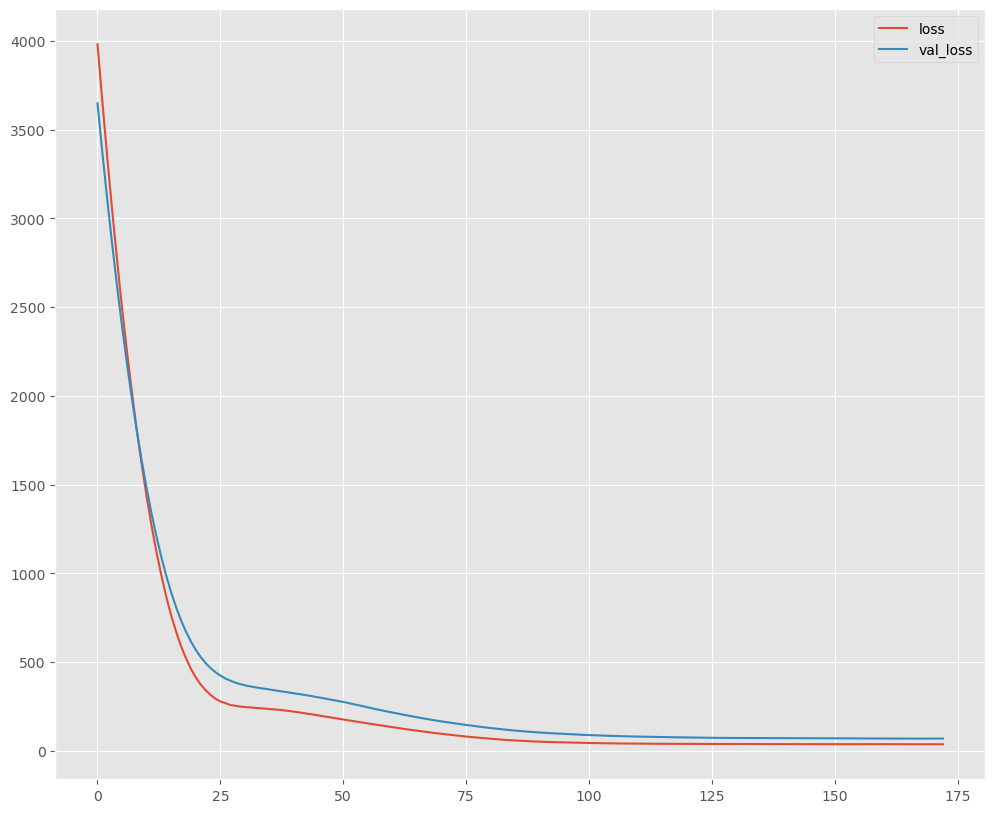

In [18]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

In [19]:
ann.evaluate(x_train,y_train)

2/2 [==============================] - 0s 8ms/step - loss: 36.3643


36.36426544189453

In [20]:
x_test

,BOX_PRICE,LOW_TEMP,HIGH_TEMP,HIMUDITY,WIND,NUM_BOX_BUY
24,290,26,32,84,5,90
39,190,27,32,71,7,90
52,220,25,29,84,2,73
27,240,26,29,75,6,78
44,170,24,29,69,6,90
2,530,27,27,92,17,57
21,280,26,32,60,2,60
62,200,26,30,80,5,90
41,260,26,31,71,9,85
50,170,27,31,78,9,82


In [21]:
predictions = ann.predict(x_test)

1/1 [==============================] - 0s 109ms/step


In [22]:
predictions

array([[87.27088 ],
       [83.02819 ],
       [81.85343 ],
       [78.20766 ],
       [81.775604],
       [75.30766 ],
       [59.373703],
       [87.85989 ],
       [78.40629 ],
       [84.8708  ],
       [79.42026 ],
       [85.79989 ],
       [83.956276],
       [73.1117  ],
       [73.4682  ],
       [89.35977 ],
       [77.88321 ],
       [80.487885],
       [74.92995 ],
       [72.78174 ]], dtype=float32)

In [23]:
y_test

,SALED
24,90
39,90
52,65
27,78
44,87
2,57
21,59
62,90
41,85
50,73


In [24]:

predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat( [ pd.DataFrame(np.ravel(y_test),columns=["Real Values"]) , predictions_df],axis=1)
comparison_df 

,Real Values,Predictions
0,90,87.270882
1,90,83.028191
2,65,81.853432
3,78,78.207657
4,87,81.775604
5,57,75.307663
6,59,59.373703
7,90,87.859894
8,85,78.406288
9,73,84.870796


In [25]:
y_test,predictions

(    SALED
 24     90
 39     90
 52     65
 27     78
 44     87
 2      57
 21     59
 62     90
 41     85
 50     73
 38     83
 54     82
 35     96
 26     73
 57     68
 49     84
 3      75
 40     87
 36     81
 10     60,
 array([[87.27088 ],
        [83.02819 ],
        [81.85343 ],
        [78.20766 ],
        [81.775604],
        [75.30766 ],
        [59.373703],
        [87.85989 ],
        [78.40629 ],
        [84.8708  ],
        [79.42026 ],
        [85.79989 ],
        [83.956276],
        [73.1117  ],
        [73.4682  ],
        [89.35977 ],
        [77.88321 ],
        [80.487885],
        [74.92995 ],
        [72.78174 ]], dtype=float32))

Text(0, 0.5, 'Actual Values')

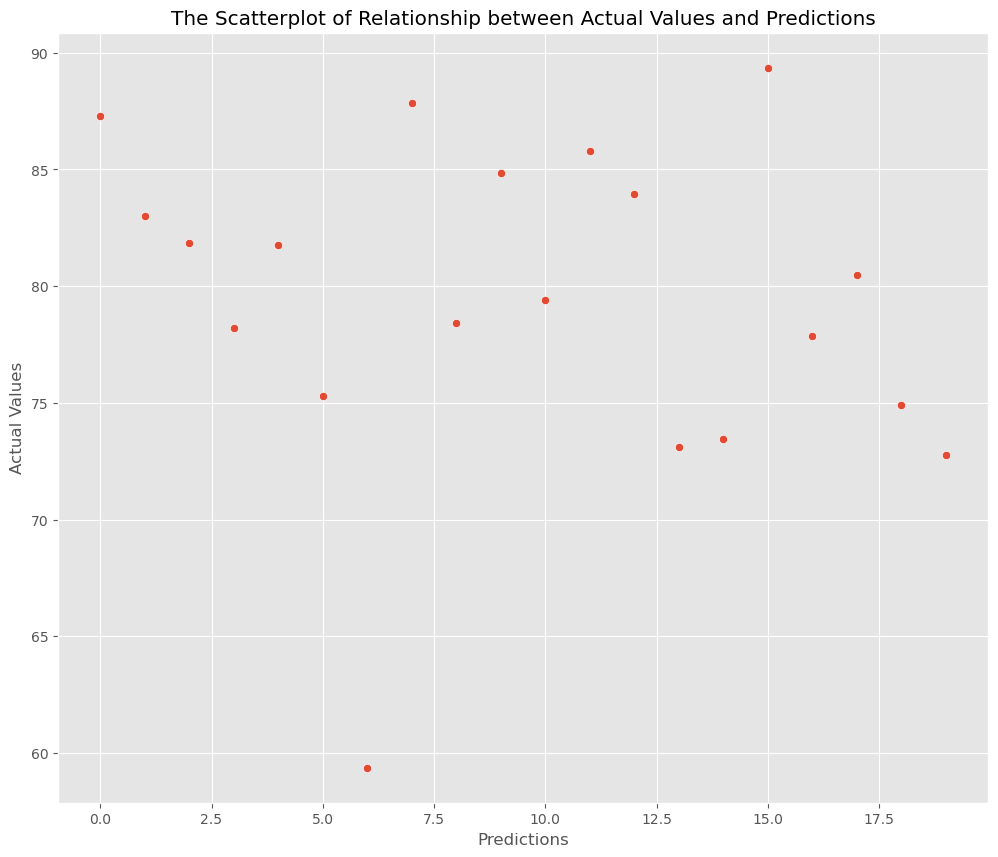

In [26]:
# here I will visualize the real test values(y_test) versus the predicted values.
plt.figure(figsize=(12,10))
sns.scatterplot(np.ravel(predictions))#,y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
#It seems that our model predicts very well

In [27]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 6.494126892089843
MSE: 68.67988224669826
RMSE: 8.287332637628241


In [28]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,predictions)*100  #This shows our model predict %93 of the target correctly

46.56405359121044

/tmp/ipykernel_23/1465659108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins=50) #this figure also proves that our model fits very good


<Axes: ylabel='Density'>

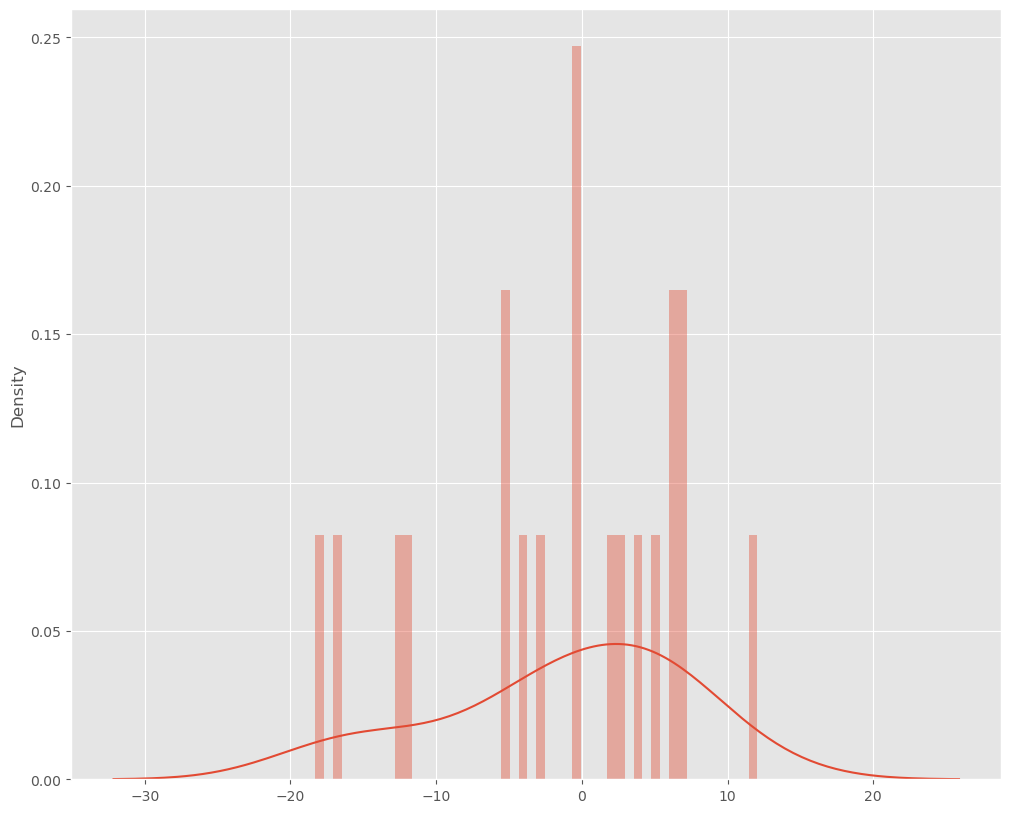

In [29]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-predictions,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data